In [2]:
import tensorflow as tf
import numpy as np
tf.compat.v1.disable_eager_execution()


In [3]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [5]:
a = tf.compat.v1.placeholder(tf.float32)
b= tf.compat.v1.placeholder(tf.float32)

In [9]:
add_op = a+b
mul_op = a*b
sess = tf.compat.v1.InteractiveSession()
add_res = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
print(add_res)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [10]:
n_features = 10
n_dense_neurons = 3
x = tf.compat.v1.placeholder(tf.float32,(None,n_features))
w = tf.Variable(tf.random.normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))


In [12]:
xw = tf.matmul(x,w)
z = tf.add(xw,b)
a = tf.sigmoid(z)
init = tf.compat.v1.global_variables_initializer()
sess.run(init)
layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [13]:
print(layer_out)

[[0.9208232  0.5874665  0.83637303]]


In [14]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [15]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

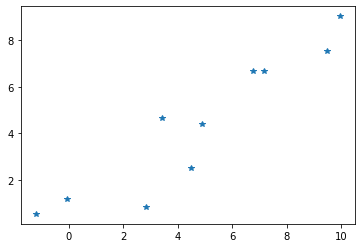

In [17]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_label,'*')
plt.show()

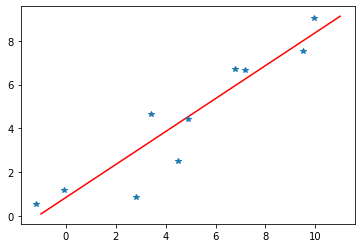

In [23]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2


optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

init = tf.compat.v1.global_variables_initializer()
sess.run(init)
training_steps = 100
for i in range(training_steps):
    sess.run(train)

final_slope, final_intercept = sess.run([m,b])

x_test = np.linspace(-1,11,10)
y_pred_plot = final_intercept+ final_slope*x_test

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [24]:
sess.close()